In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("Billionaires Statistics Dataset.csv")
dataset.set_index('rank', inplace=True)

In [3]:
dataset.head()

,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,organization,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
rank,,,,,,,,,,,,,,,,,,,,,
1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,LVMH Moët Hennessy Louis Vuitton,...,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749
2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,Tesla,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,Amazon,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,Oracle,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,Berkshire Hathaway Inc. (Cl A),...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891


In [4]:
dataset.shape

(2640, 34)

In [5]:
dataset.dtypes

finalWorth                                      int64
category                                       object
personName                                     object
age                                           float64
country                                        object
city                                           object
source                                         object
industries                                     object
countryOfCitizenship                           object
organization                                   object
selfMade                                         bool
status                                         object
gender                                         object
birthDate                                      object
lastName                                       object
firstName                                      object
title                                          object
date                                           object
state                       

In [6]:
dataset.columns

Index(['finalWorth', 'category', 'personName', 'age', 'country', 'city',
       'source', 'industries', 'countryOfCitizenship', 'organization',
       'selfMade', 'status', 'gender', 'birthDate', 'lastName', 'firstName',
       'title', 'date', 'state', 'residenceStateRegion', 'birthYear',
       'birthMonth', 'birthDay', 'cpi_country', 'cpi_change_country',
       'gdp_country', 'gross_tertiary_education_enrollment',
       'gross_primary_education_enrollment_country', 'life_expectancy_country',
       'tax_revenue_country_country', 'total_tax_rate_country',
       'population_country', 'latitude_country', 'longitude_country'],
      dtype='object')

In [7]:
dataset.nunique()

finalWorth                                     219
category                                        18
personName                                    2638
age                                             79
country                                         78
city                                           741
source                                         906
industries                                      18
countryOfCitizenship                            77
organization                                   294
selfMade                                         2
status                                           6
gender                                           2
birthDate                                     2060
lastName                                      1736
firstName                                     1770
title                                           97
date                                             2
state                                           45
residenceStateRegion           

In [8]:
by_country = dataset.groupby('country')['finalWorth'].sum()
by_country.sort_values(ascending=False)

country
United States    4575100
China            1805500
India             628700
France            499500
Germany           462100
                  ...   
Uruguay             1800
Tanzania            1500
Andorra             1500
Bahrain             1500
Armenia             1200
Name: finalWorth, Length: 78, dtype: int64

In [9]:
self_made_by_gender = dataset[dataset['selfMade']==True].groupby('gender').size()
self_made_by_gender

gender
F      96
M    1716
dtype: int64

In [10]:
n = dataset.groupby('gender')['selfMade'].size()
n

gender
F     337
M    2303
Name: selfMade, dtype: int64

In [11]:
result = dataset.groupby(['gender', 'selfMade']).size().unstack(fill_value=0)

result['Total'] = result.sum(axis=1)

result

selfMade,False,True,Total
gender,,,
F,241,96,337
M,587,1716,2303


In [26]:
result.transpose()
result

selfMade,False,True,Total
gender,,,
F,241,96,337
M,587,1716,2303


<Axes: xlabel='selfMade'>

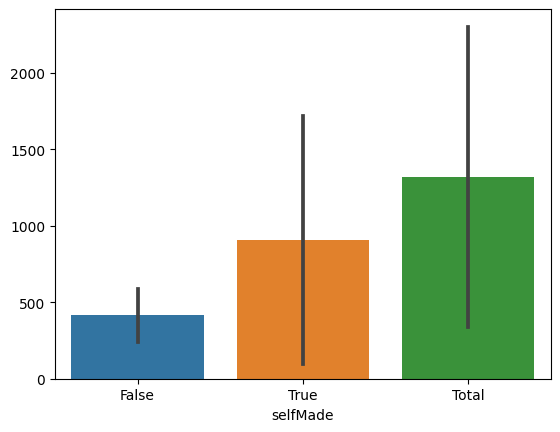

In [15]:
sns.barplot(result)

In [33]:
dataset['status'].unique()

array(['U', 'D', 'N', 'Split Family Fortune', 'E', 'R'], dtype=object)

In [34]:
dataset['country'].unique()

array(['France', 'United States', 'Mexico', 'India', 'Spain', 'China',
       'Canada', 'Germany', 'Switzerland', 'Belgium', 'Hong Kong',
       'Austria', 'Japan', 'United Kingdom', 'Australia', 'Indonesia',
       'United Arab Emirates', 'Russia', 'Chile', 'Monaco',
       'Czech Republic', 'Sweden', nan, 'Thailand', 'Uzbekistan',
       'Singapore', 'Nigeria', 'Israel', 'Italy', 'South Africa',
       'Brazil', 'Malaysia', 'South Korea', 'New Zealand', 'Philippines',
       'Taiwan', 'Norway', 'Egypt', 'Denmark', 'Eswatini (Swaziland)',
       'Colombia', 'Netherlands', 'Poland', 'Bahamas', 'Ukraine',
       'Cayman Islands', 'Greece', 'Turkey', 'Argentina', 'Georgia',
       'Portugal', 'Kazakhstan', 'Algeria', 'Vietnam', 'Latvia',
       'Finland', 'Bermuda', 'Luxembourg', 'British Virgin Islands',
       'Cambodia', 'Lebanon', 'Oman', 'Ireland', 'Cyprus', 'Guernsey',
       'Liechtenstein', 'Turks and Caicos Islands', 'Romania', 'Qatar',
       'Uruguay', 'Nepal', 'Slovakia', 'Mo

In [38]:
russia = dataset[dataset['country']=='Russia']
russia.loc[russia['finalWorth'] >= 10000]

,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,organization,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
rank,,,,,,,,,,,,,,,,,,,,,
62,23700,Metals & Mining,Vladimir Potanin,62.0,Russia,Moscow,Metals,Metals & Mining,Russia,NaN,...,4.5,"$1,699,876,578,871",81.9,102.6,72.7,11.4,46.2,144373535.0,61.52401,105.318756
70,22100,Metals & Mining,Vladimir Lisin,66.0,Russia,Moscow,"Steel, transport",Metals & Mining,Russia,NaN,...,4.5,"$1,699,876,578,871",81.9,102.6,72.7,11.4,46.2,144373535.0,61.52401,105.318756
72,21600,Energy,Leonid Mikhelson & family,67.0,Russia,Moscow,"Gas, chemicals",Energy,Russia,NaN,...,4.5,"$1,699,876,578,871",81.9,102.6,72.7,11.4,46.2,144373535.0,61.52401,105.318756
79,20900,Metals & Mining,Alexey Mordashov & family,57.0,Russia,Moscow,"Steel, investments",Metals & Mining,Russia,NaN,...,4.5,"$1,699,876,578,871",81.9,102.6,72.7,11.4,46.2,144373535.0,61.52401,105.318756
80,20500,Energy,Vagit Alekperov,72.0,Russia,Moscow,Oil,Energy,Russia,NaN,...,4.5,"$1,699,876,578,871",81.9,102.6,72.7,11.4,46.2,144373535.0,61.52401,105.318756
89,18500,Energy,Gennady Timchenko,70.0,Russia,Moscow,"Oil, gas",Energy,Russia,NaN,...,4.5,"$1,699,876,578,871",81.9,102.6,72.7,11.4,46.2,144373535.0,61.52401,105.318756
167,10500,Finance & Investments,Suleiman Kerimov & family,57.0,Russia,Moscow,Gold,Finance & Investments,Russia,NaN,...,4.5,"$1,699,876,578,871",81.9,102.6,72.7,11.4,46.2,144373535.0,61.52401,105.318756
171,10200,Manufacturing,Viktor Rashnikov,74.0,Russia,Magnitogorsk,Steel,Manufacturing,Russia,NaN,...,4.5,"$1,699,876,578,871",81.9,102.6,72.7,11.4,46.2,144373535.0,61.52401,105.318756


In [39]:
dataset.columns

Index(['finalWorth', 'category', 'personName', 'age', 'country', 'city',
       'source', 'industries', 'countryOfCitizenship', 'organization',
       'selfMade', 'status', 'gender', 'birthDate', 'lastName', 'firstName',
       'title', 'date', 'state', 'residenceStateRegion', 'birthYear',
       'birthMonth', 'birthDay', 'cpi_country', 'cpi_change_country',
       'gdp_country', 'gross_tertiary_education_enrollment',
       'gross_primary_education_enrollment_country', 'life_expectancy_country',
       'tax_revenue_country_country', 'total_tax_rate_country',
       'population_country', 'latitude_country', 'longitude_country'],
      dtype='object')

In [54]:
top_10 = dataset.groupby('country')['finalWorth'].sum().sort_values(ascending=False)
top_10 = top_10[:10]
top_10 = top_10.index.tolist()
top_10

['United States',
 'China',
 'India',
 'France',
 'Germany',
 'Switzerland',
 'United Kingdom',
 'Russia',
 'Hong Kong',
 'Canada']

In [56]:
top_10 = dataset[dataset['country'].isin(top_10)]
top_10

,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,organization,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
rank,,,,,,,,,,,,,,,,,,,,,
1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,LVMH Moët Hennessy Louis Vuitton,...,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,6.705989e+07,46.227638,2.213749
2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,Tesla,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,Amazon,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,Oracle,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,Berkshire Hathaway Inc. (Cl A),...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2540,1000,Healthcare,Yi Xianzhong & family,63.0,China,Guangzhou,Pharmaceuticals,Healthcare,China,NaN,...,2.9,"$19,910,000,000,000",50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397
2540,1000,Healthcare,Yu Rong,51.0,China,Shanghai,Health clinics,Healthcare,China,NaN,...,2.9,"$19,910,000,000,000",50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397
2540,1000,Food & Beverage,"Richard Yuengling, Jr.",80.0,United States,Pottsville,Beer,Food & Beverage,United States,NaN,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891


In [61]:
richest_people = top_10.groupby('country')['finalWorth'].idxmax()
top_10.loc[richest_people]

,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,organization,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
rank,,,,,,,,,,,,,,,,,,,,,
22,54400,Media & Entertainment,David Thomson & family,65.0,Canada,Toronto,Media,Media & Entertainment,Canada,Thomson Reuters Corporation,...,1.9,"$1,736,425,629,520",68.9,100.9,81.9,12.8,24.5,3.699198e+07,56.130366,-106.346771
15,68000,Food & Beverage,Zhong Shanshan,68.0,China,Hangzhou,"Beverages, pharmaceuticals",Food & Beverage,China,NaN,...,2.9,"$19,910,000,000,000",50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397
1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,LVMH Moët Hennessy Louis Vuitton,...,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,6.705989e+07,46.227638,2.213749
27,42900,Fashion & Retail,Dieter Schwarz,83.0,Germany,Neckarsulm,Retail,Fashion & Retail,Germany,NaN,...,1.4,"$3,845,630,030,824",70.2,104.0,80.9,11.5,48.8,8.313280e+07,51.165691,10.451526
33,38000,Diversified,Li Ka-shing,94.0,Hong Kong,NaN,Diversified,Diversified,Hong Kong,CK Hutchison Holdings,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,83400,Diversified,Mukesh Ambani,65.0,India,Mumbai,Diversified,Diversified,India,Reliance Industries,...,7.7,"$2,611,000,000,000",28.1,113.0,69.4,11.2,49.7,1.366418e+09,20.593684,78.962880
62,23700,Metals & Mining,Vladimir Potanin,62.0,Russia,Moscow,Metals,Metals & Mining,Russia,NaN,...,4.5,"$1,699,876,578,871",81.9,102.6,72.7,11.4,46.2,1.443735e+08,61.524010,105.318756
29,39100,Logistics,Klaus-Michael Kuehne,85.0,Switzerland,Schindellegi,Shipping,Logistics,Germany,NaN,...,0.4,"$703,082,435,360",59.6,105.2,83.6,10.1,28.8,8.574832e+06,46.818188,8.227512
40,32100,Diversified,Len Blavatnik,65.0,United Kingdom,London,"Music, chemicals",Diversified,United States,NaN,...,1.7,"$2,827,113,184,696",60.0,101.2,81.3,25.5,30.6,6.683440e+07,55.378051,-3.435973


In [62]:
dataset.columns

Index(['finalWorth', 'category', 'personName', 'age', 'country', 'city',
       'source', 'industries', 'countryOfCitizenship', 'organization',
       'selfMade', 'status', 'gender', 'birthDate', 'lastName', 'firstName',
       'title', 'date', 'state', 'residenceStateRegion', 'birthYear',
       'birthMonth', 'birthDay', 'cpi_country', 'cpi_change_country',
       'gdp_country', 'gross_tertiary_education_enrollment',
       'gross_primary_education_enrollment_country', 'life_expectancy_country',
       'tax_revenue_country_country', 'total_tax_rate_country',
       'population_country', 'latitude_country', 'longitude_country'],
      dtype='object')

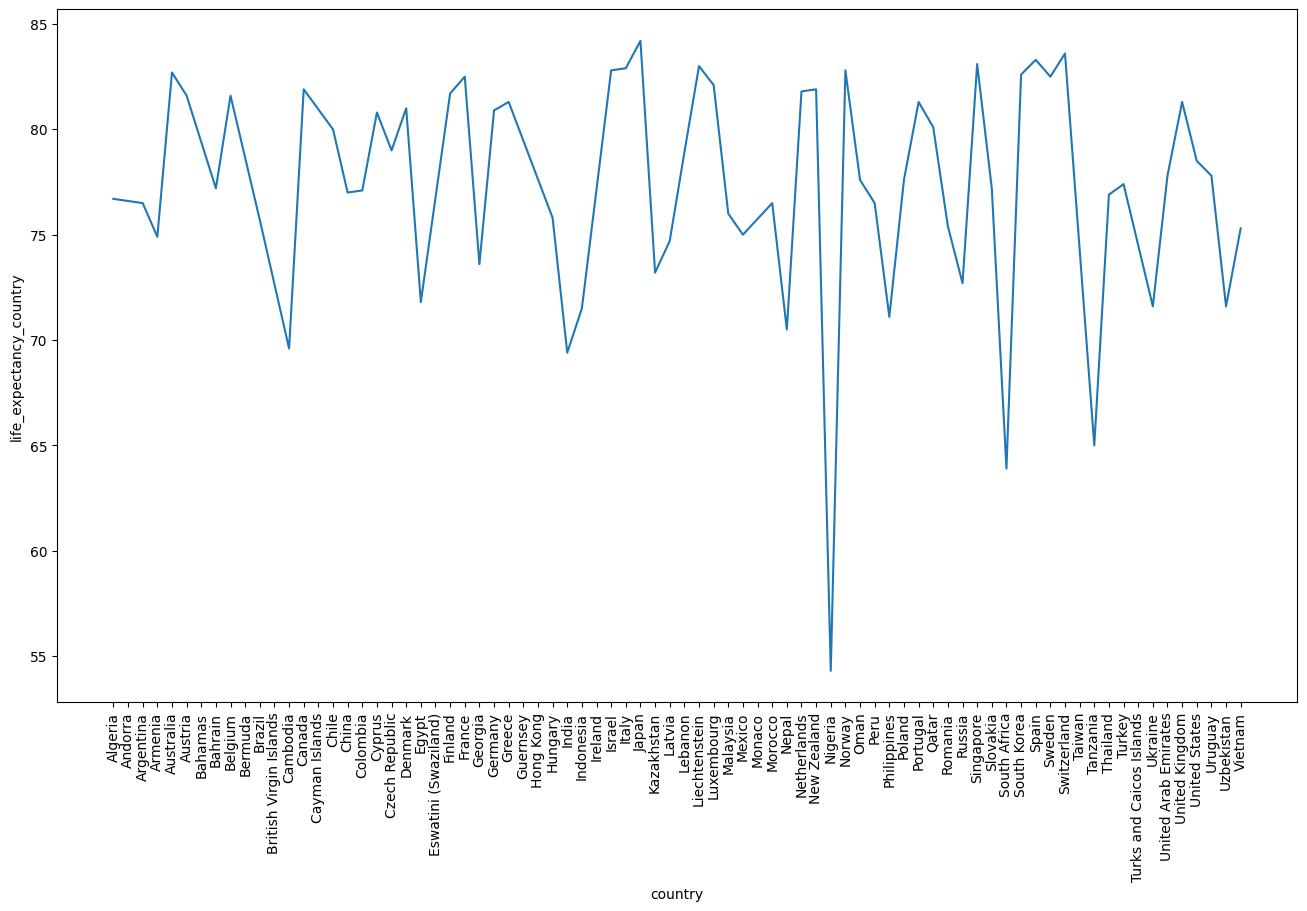

In [73]:
life_exp = dataset.groupby('country')['life_expectancy_country'].mean()
life_exp.dropna()

plt.figure(figsize=(16, 9))
sns.lineplot(life_exp)
plt.xticks(rotation=90)
plt.show()

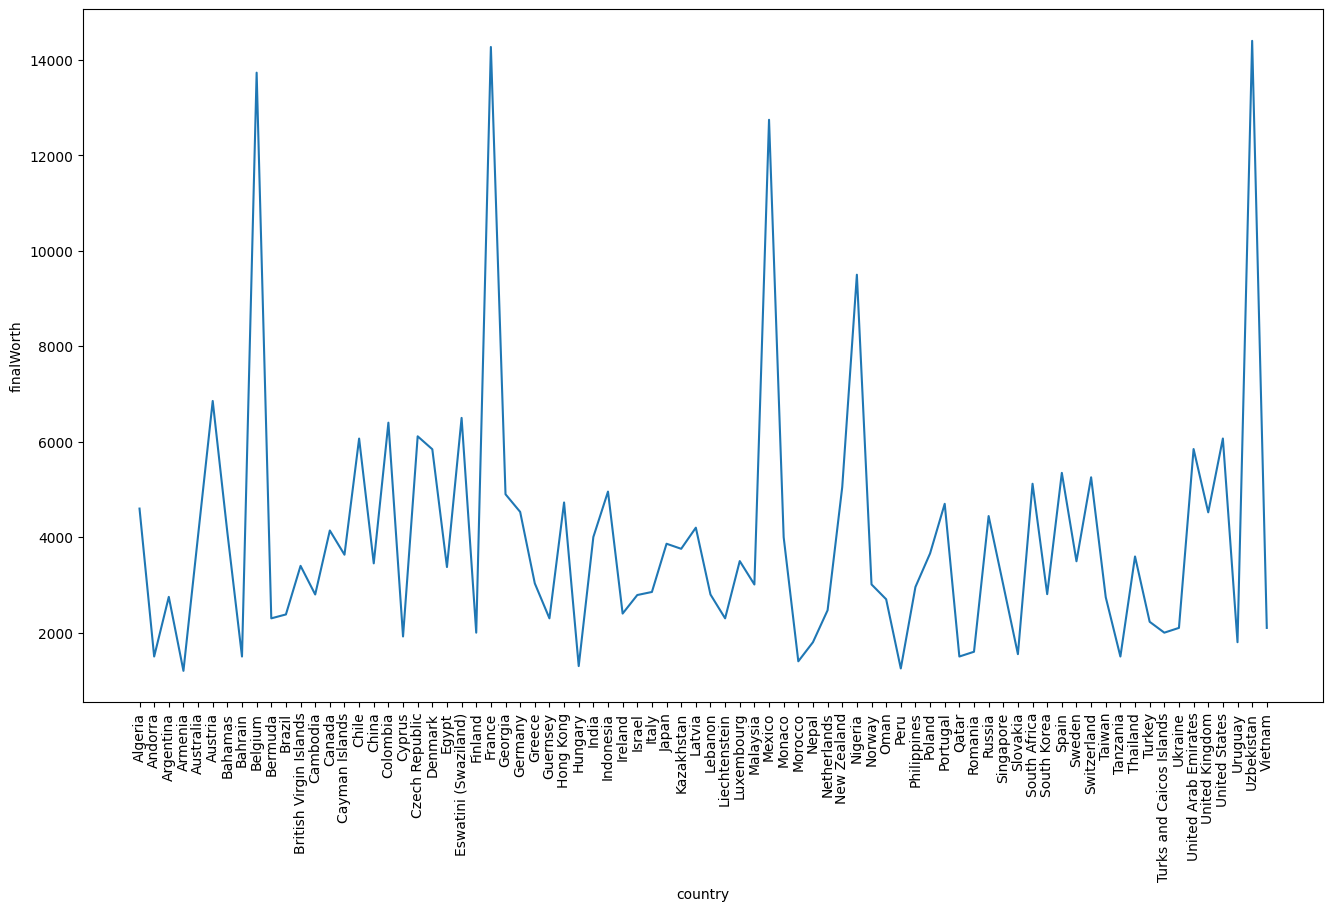

In [77]:
rich = dataset.groupby('country')['finalWorth'].mean()

plt.figure(figsize=(16, 9))
sns.lineplot(rich)
plt.xticks(rotation=90)
plt.show()

In [79]:
numer = dataset.select_dtypes(include=['int64', 'float64'])

<Axes: >

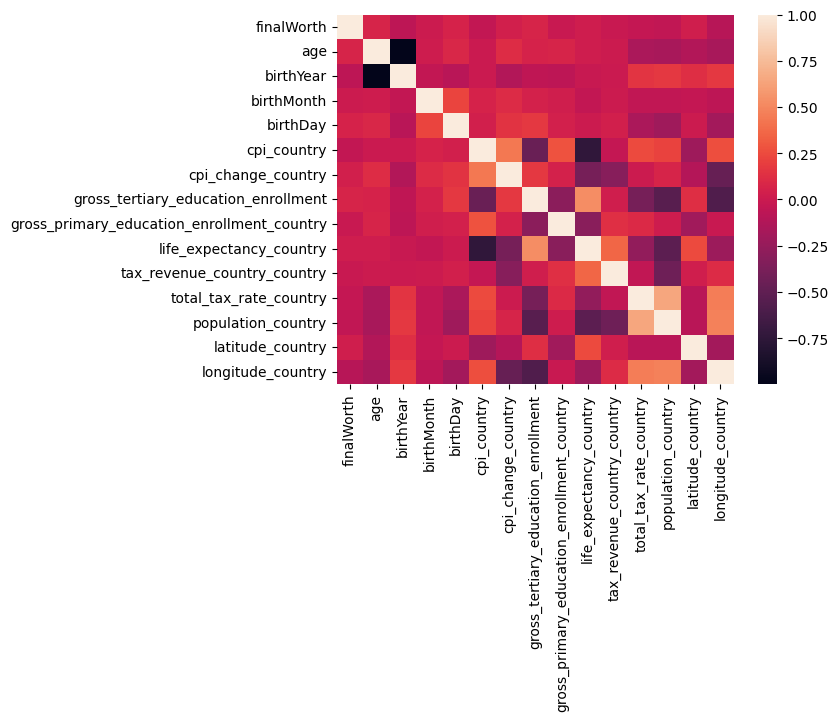

In [81]:
sns.heatmap(numer.corr())